In [1]:
import pandas as pd
import os
from itertools import product
import numpy as np
import re

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rcParams["figure.dpi"] = 140

In [2]:
folder = 'downsample_metrics/'
filenames = os.listdir(folder)

In [3]:
methods = ['X_scvi', 'X_ldvae', 'X_expimap_1', 'X_cdec_lr_0.05_pca_True']

In [4]:
p = re.compile("scIB_IE_(.*)_B_donor_CT_celltype.*")
dct = {}
for file in filenames:
    dat = pd.read_pickle(folder+file)
    ds = dat.pop('adata_name')
    
    method = p.search(file).group(1)
    df = pd.DataFrame(dat, index=[method])
    
    if ds in dct:
        dct[ds] = dct[ds].append(df)
    else:
        dct[ds] = df

In [5]:
for ds in dct:
    dct[ds]['overall'] = dct[ds].mean(axis=1)

In [6]:
metrics_overall = None
for ds in dct:
    df = pd.DataFrame(dct[ds]['overall'].to_dict(), index=[ds])
    metrics_overall = df if metrics_overall is None else metrics_overall.append(df)

In [7]:
dct.keys()

dict_keys(['blood_ssample_0_005.h5ad', 'blood_ssample_0_01.h5ad', 'blood_ssample_0_05.h5ad', 'blood_ssample_0_1.h5ad', 'blood_ssample_0_25.h5ad', 'blood_ssample_0_5.h5ad', 'blood_ssample_1.h5ad'])

<AxesSubplot:>

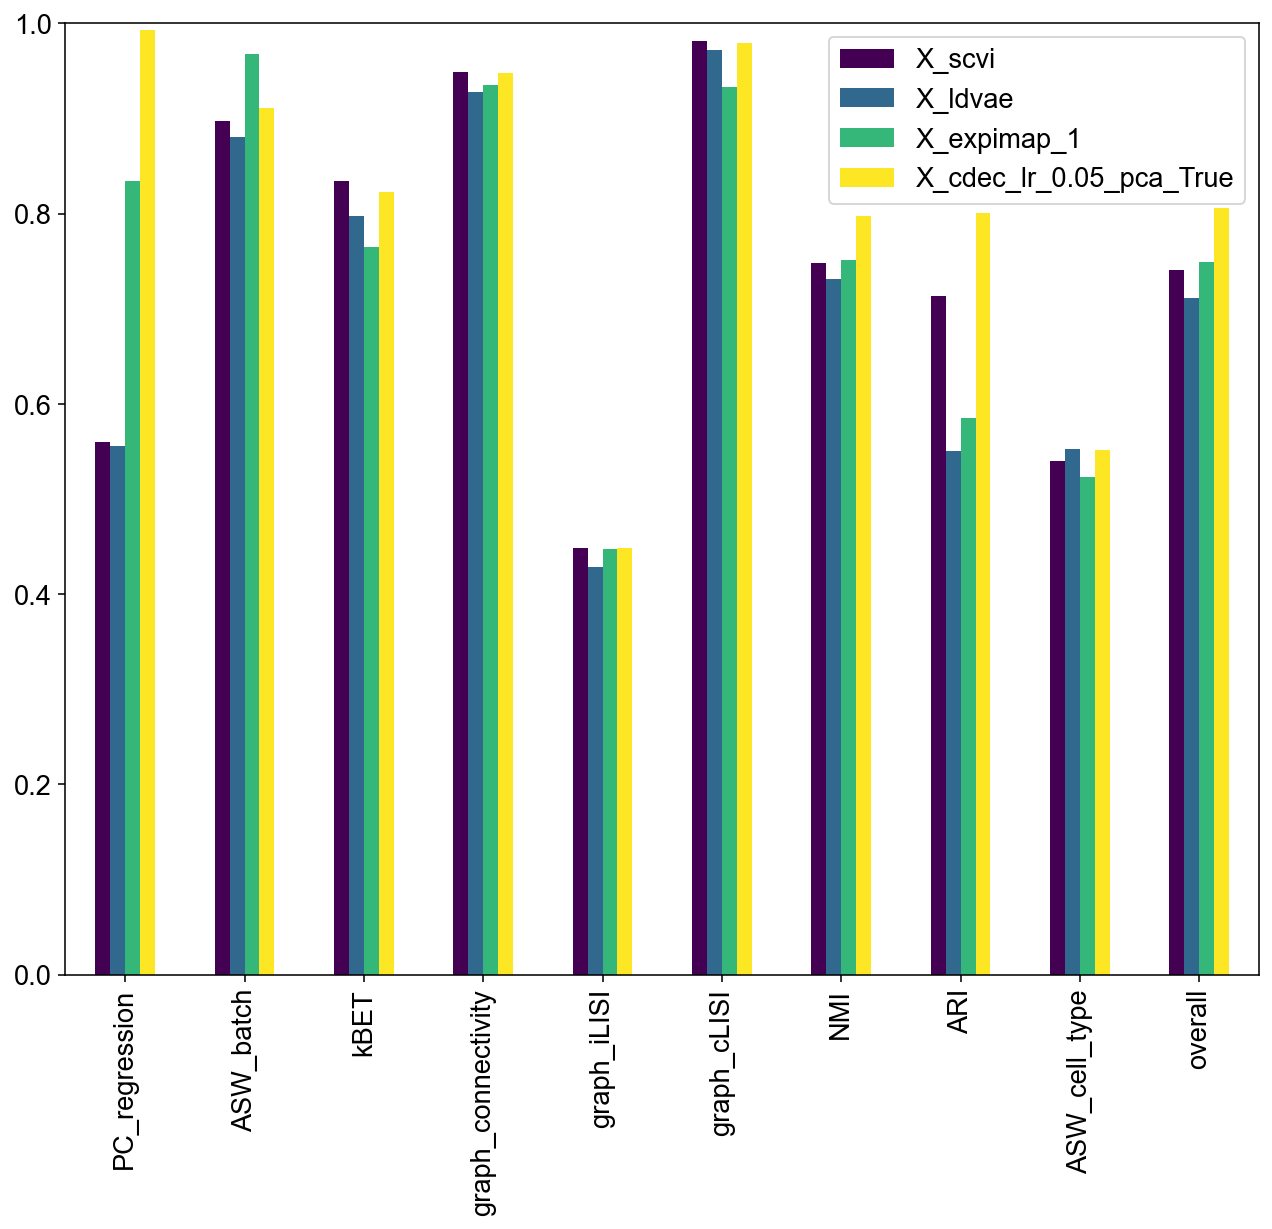

In [8]:
dct['blood_ssample_0_5.h5ad'].loc[methods].T.plot.bar(figsize=(11,9), colormap='viridis', ylim=(0,1))

<AxesSubplot:>

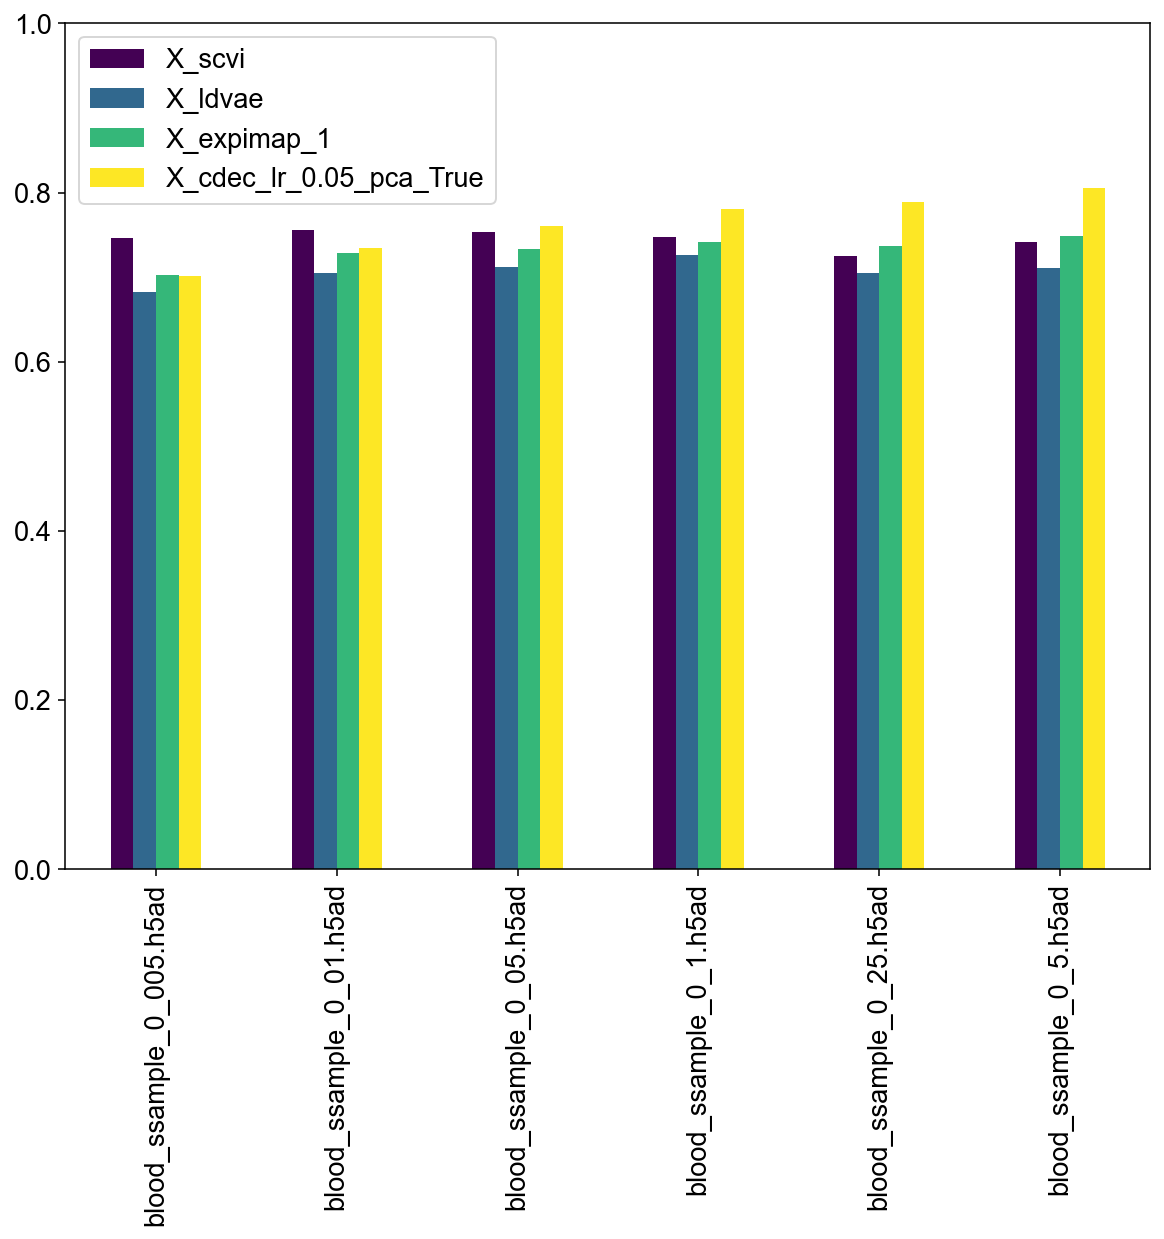

In [9]:
metrics_overall.loc[:, methods].plot.bar(figsize=(10,8), colormap='viridis', ylim=(0,1))

In [8]:
metrics_overall.index = ['0.005', '0.01', '0.05', '0.1', '0.25', '0.5', '1']

In [9]:
rnm = {'X_scvi': 'scVI', 'X_cdec_lr_0.05_pca_True': 'scVI (non-amortized)', 'X_expimap_1': 'expiMap', 'X_ldvae': 'LDVAE'}
metrics_overall = metrics_overall.rename(columns=rnm)

In [10]:
methods = ['expiMap', 'scVI', 'scVI (non-amortized)', 'LDVAE']

In [11]:
metrics_overall = metrics_overall.loc[:, methods]

In [12]:
cm = matplotlib.cm.get_cmap('viridis')

In [13]:
colors = []
for i in np.linspace(0, 1, 4):
    colors.append(cm(i))
colors[-2] = cm(0.7)
colors[-1] = cm(0.92)

<AxesSubplot:>

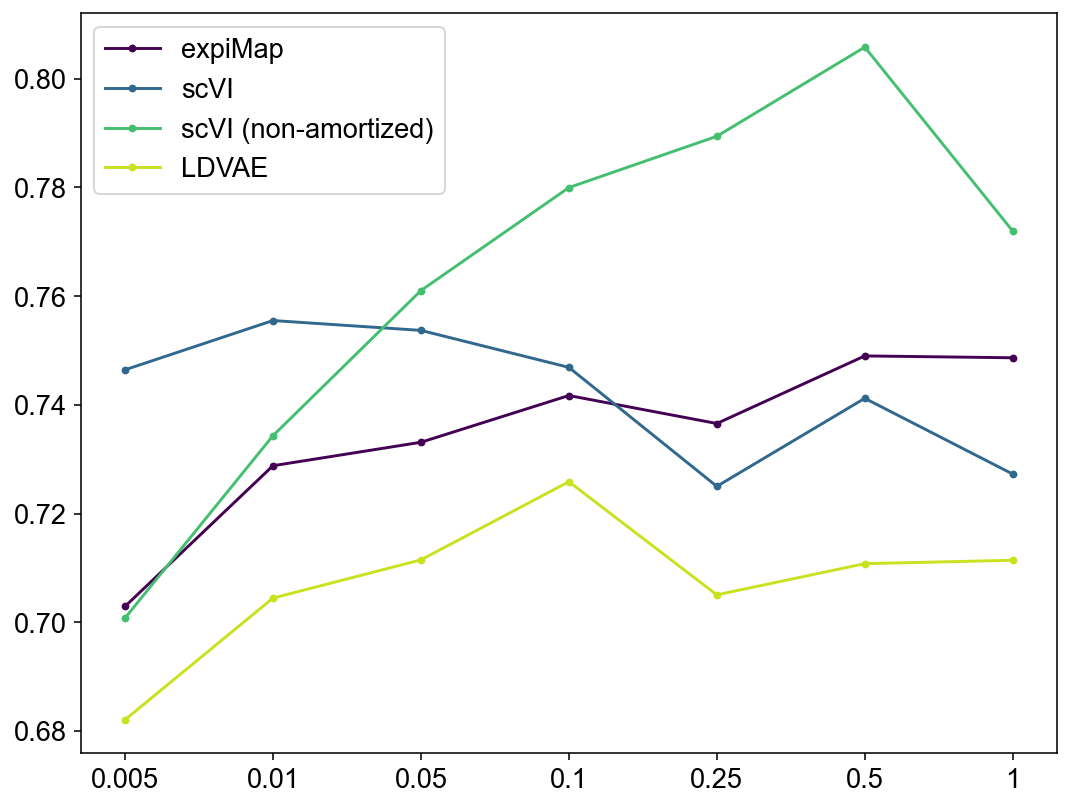

In [14]:
metrics_overall.loc[:, methods].plot.line(style='.-', color=colors, figsize=(9,7))